In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [2]:
df = pd.read_csv('train.csv', low_memory=False )
print('Shape of df is: ', df.shape)
df.head(3)

Shape of df is:  (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=1017209, step=1)

In [7]:
store = pd.read_csv('store.csv')

In [8]:
store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [9]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [11]:
df_new = df.merge(store,on=["Store"], how="inner")

In [12]:
len(df_new['Store'].unique())

1115

In [13]:
df_new['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [14]:
# Date feature

df_new['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)
df_new['Month']=df_new['Date'].dt.month
df_new['Quarter']=df_new['Date'].dt.quarter
df_new['Year']=df_new['Date'].dt.year
df_new['Day']=df_new['Date'].dt.day
df_new['Week']=df_new['Date'].dt.week

df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",
np.where(df_new["Month"].isin([6,7,8]),
"Summer",
np.where(df_new["Month"].isin
([9,10,11]),"Fall",
np.where(df_new["Month"].isin
([12,1,2]),"Winter","None"))))

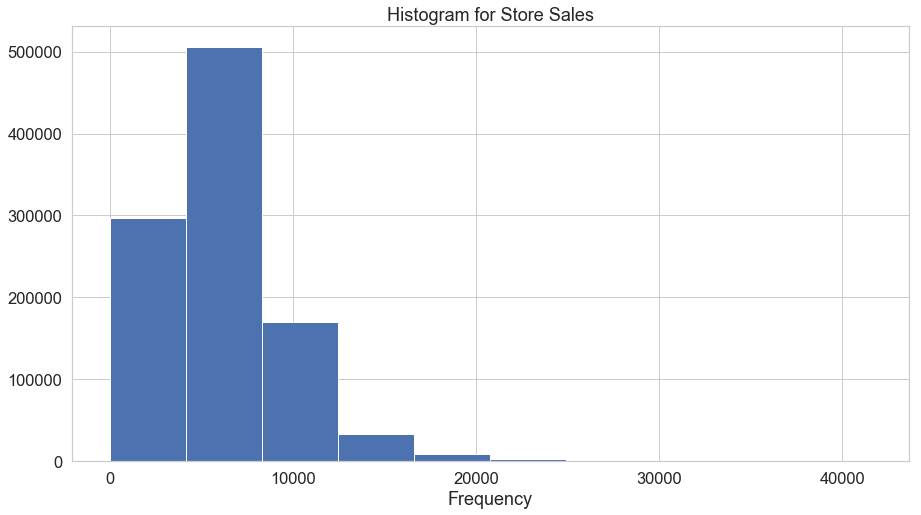

In [15]:
#Import matplotlib, python most popular data visualizing library
import matplotlib.pyplot as plt
%matplotlib inline

#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(15,8))
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

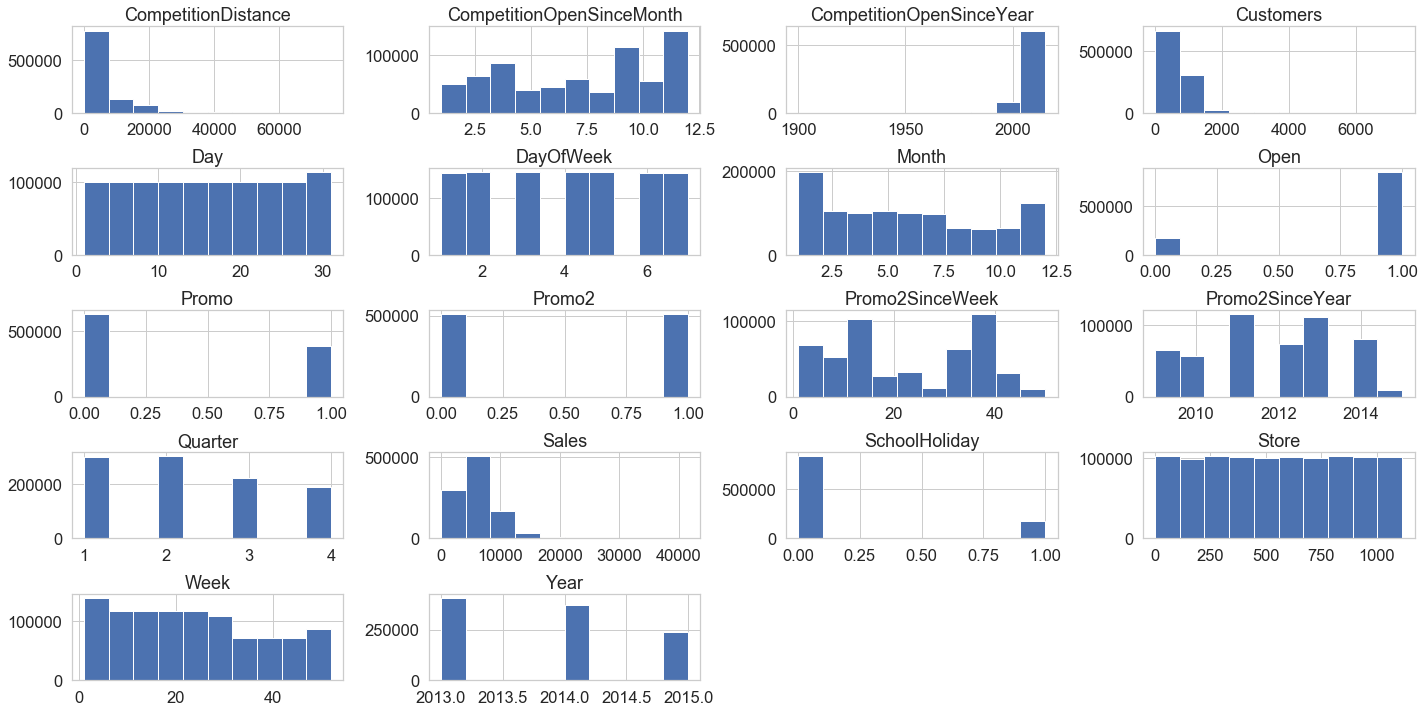

In [16]:
#Use the histogram function provided by the Pandas object
#The function returns a cross-tab histogram plot for all numeric columns in the data
df_new.hist(figsize=(20,10))
plt.tight_layout()
plt.show()



In [17]:
print((df_new.isnull().sum()/df_new.shape[0])*100)

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64


In [18]:
df_new_missing = df_new[['Store' ,'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]

for i in range(1, len(df_new_missing['Store'].unique())):
    print('The percentage of the missing values in the store',i,'is: ')
    print((df_new_missing[df_new_missing['Store']==i].isnull().sum()/df_new_missing[df_new_missing['Store']==i].shape[0])*100)
    
    

The percentage of the missing values in the store 1 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 2 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 3 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval           

dtype: float64
The percentage of the missing values in the store 27 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 28 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 29 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInt

The percentage of the missing values in the store 52 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 53 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 54 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval        

The percentage of the missing values in the store 77 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 78 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 79 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval          

dtype: float64
The percentage of the missing values in the store 103 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 104 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 105 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 128 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 129 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 130 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 153 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 154 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 155 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear         

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 181 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 182 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentag

dtype: float64
The percentage of the missing values in the store 206 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 207 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 208 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 231 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 232 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 233 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
Promo

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 261 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 262 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentag

dtype: float64
The percentage of the missing values in the store 286 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 287 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 288 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 314 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 315 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 316 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 339 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 340 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float

dtype: float64
The percentage of the missing values in the store 363 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 364 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 365 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 396 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 397 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 398 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 421 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 422 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 423 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 450 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 451 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 452 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval      

dtype: float64
The percentage of the missing values in the store 479 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 480 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 481 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear         

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 506 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 507 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 530 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 531 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float

dtype: float64
The percentage of the missing values in the store 558 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 559 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 560 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

dtype: float64
The percentage of the missing values in the store 585 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 586 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 587 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear     

dtype: float64
The percentage of the missing values in the store 616 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 617 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 618 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 641 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 642 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing

The percentage of the missing values in the store 671 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 672 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 673 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
Prom

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 697 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 698 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 728 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 729 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float

The percentage of the missing values in the store 752 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 753 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 754 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
d

dtype: float64
The percentage of the missing values in the store 786 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 787 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 788 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear         

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 811 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 812 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float

dtype: float64
The percentage of the missing values in the store 838 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 839 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 840 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 864 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 865 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentag

Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 890 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 891 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float

dtype: float64
The percentage of the missing values in the store 913 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 914 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 915 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
Pro

The percentage of the missing values in the store 938 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 939 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 940 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear        

dtype: float64
The percentage of the missing values in the store 964 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 965 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 966 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2Si

dtype: float64
The percentage of the missing values in the store 996 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 997 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 998 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval      

dtype: float64
The percentage of the missing values in the store 1027 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 1028 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 1029 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear      

dtype: float64
The percentage of the missing values in the store 1056 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo2SinceYear                0.0
PromoInterval                  0.0
dtype: float64
The percentage of the missing values in the store 1057 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 1058 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth    100.0
CompetitionOpenSinceYear     100.0
Promo2                         0.0
Promo2SinceWeek                0.0
Promo

dtype: float64
The percentage of the missing values in the store 1087 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear              100.0
PromoInterval                100.0
dtype: float64
The percentage of the missing values in the store 1088 is: 
Store                        0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64
The percentage of the missing values in the store 1089 is: 
Store                          0.0
CompetitionDistance            0.0
CompetitionOpenSinceMonth      0.0
CompetitionOpenSinceYear       0.0
Promo2                         0.0
Promo2SinceWeek              100.0
Promo2SinceYear      

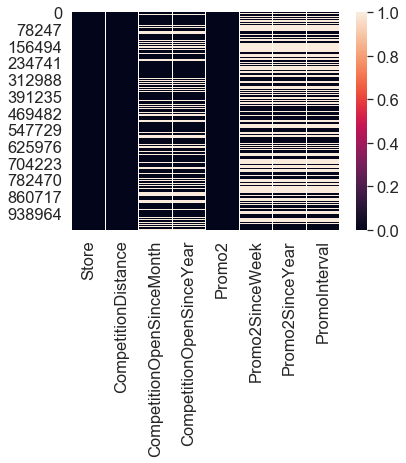

In [19]:
import seaborn as sns

sns.heatmap(df_new_missing.isnull())
plt.show()

In [20]:
#Replace nulls with the mode
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])
#Double check if we still see nulls for the column
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

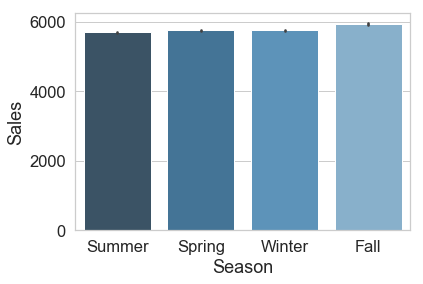

In [21]:
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new,  palette="Blues_d")

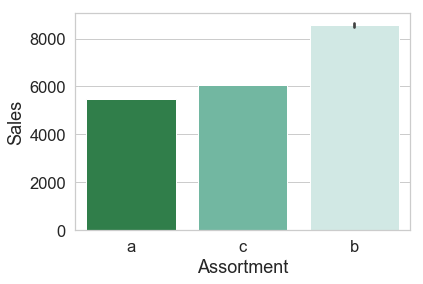

In [22]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,  palette="BuGn_r")

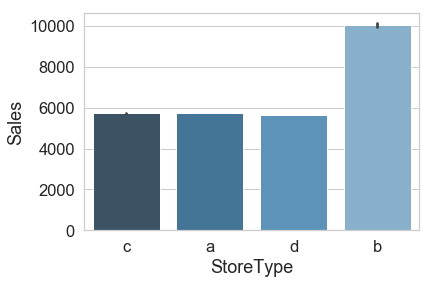

In [23]:
#Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new, palette="Blues_d")

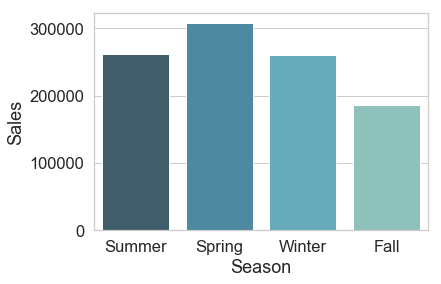

In [24]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,
estimator=np.size, palette="GnBu_d")

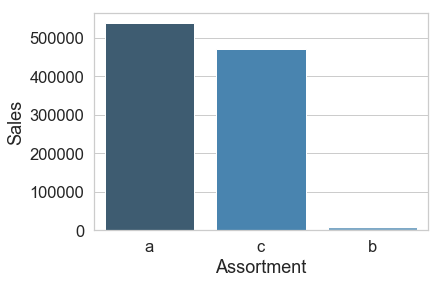

In [25]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,
estimator=np.size, palette="Blues_d")

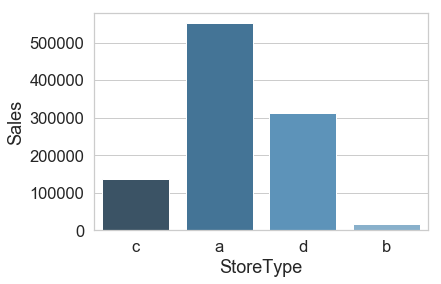

In [26]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,
estimator=np.size, palette="Blues_d")

In [27]:
#Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
target = ["Sales"]
numeric_columns = ["Customers","Open","Promo","Promo2",
"StateHoliday","SchoolHoliday","CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
"StoreType","Assortment","Season"]

In [28]:
#Define a function that will intake the raw dataframe and the column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [29]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]

for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [30]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [31]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('int32'), dtype('float64')], dtype=object)

In [32]:
from sklearn.model_selection import train_test_split
#Create train and test dataset with an 80:20 split
x_train, x_test, y_train, y_test = train_test_split(temp,
df_new[target],test_size=0.2,random_state=2018)
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)

In [33]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [34]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [35]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303215


In [36]:
# Create neural network
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(150, input_dim=44, activation = 'relu'))
model.add(Dense(1, activation='linear'))

#Config the model
model.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mean_absolute_error'])

#train model
model.fit(x_train.values,y_train.values, validation_data=
(x_val,y_val),epochs=10,batch_size=64)

Using TensorFlow backend.


Train on 732390 samples, validate on 81377 samples
Epoch 1/10
732390/732390 [==============================] - 34s 47us/step - loss: 948.1628 - mean_absolute_error: 948.1637 - val_loss: 835.0369 - val_mean_absolute_error: 835.0370
Epoch 2/10
732390/732390 [==============================] - 37s 50us/step - loss: 791.9101 - mean_absolute_error: 791.9103 - val_loss: 754.2362 - val_mean_absolute_error: 754.2365
Epoch 3/10
732390/732390 [==============================] - 33s 45us/step - loss: 750.4336 - mean_absolute_error: 750.4349 - val_loss: 742.2960 - val_mean_absolute_error: 742.2960
Epoch 4/10
732390/732390 [==============================] - 32s 44us/step - loss: 734.0721 - mean_absolute_error: 734.0743 - val_loss: 723.1142 - val_mean_absolute_error: 723.1154
Epoch 5/10
732390/732390 [==============================] - 34s 46us/step - loss: 722.5113 - mean_absolute_error: 722.5114 - val_loss: 721.4653 - val_mean_absolute_error: 721.4648
Epoch 6/10
732390/732390 [=======================

In [38]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)
#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result
    [i],2)))


203442/203442 [==============================] - 7s 33us/step
Metric  loss : 699.64
Metric  mean_absolute_error : 699.64
